<a href="https://colab.research.google.com/github/Aman-coder59/Medical_Price_predition/blob/main/Linear_regression_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [103]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [104]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [105]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [118]:
df['charges_log'] = np.log1p(df['charges'])

X = df.drop(['charges', 'charges_log'], axis=1)
y = df['charges_log']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [119]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges,charges_log
850,37,female,30.780,0,yes,northeast,37270.15120,10.525975
92,59,male,29.830,3,yes,northeast,30184.93670,10.315131
440,31,female,32.680,1,no,northwest,4738.26820,8.463638
940,18,male,23.210,0,no,southeast,1121.87390,7.023647
995,39,female,23.275,3,no,northeast,7986.47525,8.985630


In [107]:
prepo = ColumnTransformer([
    ('sex_smoker_region',OneHotEncoder(drop='first',handle_unknown='ignore'),[1,4,5])
],remainder='passthrough')

In [108]:
pipe = Pipeline([
    ('prepo',prepo),
    ('scaler',StandardScaler()),
    ('model',LinearRegression())
])

In [109]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('prepo',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sex_smoker_region',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [1, 4, 5])])),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [110]:
y_pred = pipe.predict(X_test)

In [111]:
from sklearn.metrics import r2_score

In [112]:
r2 = r2_score(y_test,y_pred)

In [113]:
r2

0.804741079139302

In [114]:
sample = X_test.iloc[[266]]

In [94]:
sample

,age,sex,bmi,children,smoker,region
543,54,female,47.41,0,yes,southeast


In [95]:
print(pipe.predict(sample))

[40920.29151165]


In [96]:
y_test

,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180
...,...
109,47055.53210
575,12222.89830
535,6067.12675
543,63770.42801


In [97]:
import joblib

In [98]:

joblib.dump(pipe,'medical_price.pkl')

['medical_price.pkl']

In [43]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [44]:
df.describe()

,age,bmi,children,charges
count,1199.000000,1199.000000,1199.000000,1199.000000
mean,38.989992,30.095200,1.084237,9927.753402
std,14.068040,6.010551,1.214304,7241.158309
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.800000,0.000000,4408.695900
50%,39.000000,29.735000,1.000000,8410.046850
75%,51.000000,33.820000,2.000000,12953.594600
max,64.000000,53.130000,5.000000,34472.841000


<Axes: ylabel='charges'>

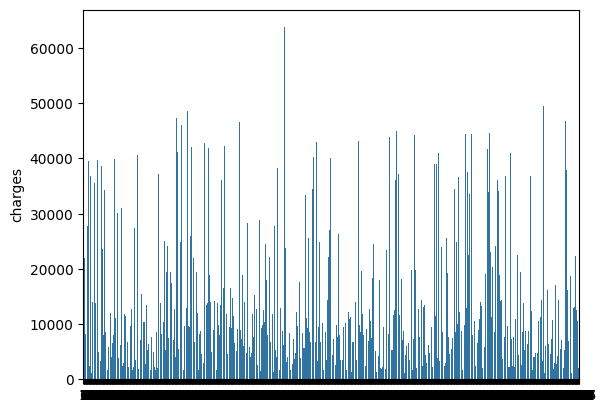

In [25]:
sns.barplot(df['charges'])